# Advanced Machine Learning (MScA 32017)

# Generalized Linear Model in Spark ML

Yuri Balasanov, &copy; iLykei 2017

## Generalized linear model in ML

Generalized linear regression model is described [here](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#module-pyspark.ml.regression).

Generalized linear model class has attributes:

`class pyspark.ml.regression.GeneralizedLinearRegression(self, labelCol="label", featuresCol="features", predictionCol="prediction", family="gaussian", link=None, fitIntercept=True, maxIter=25, tol=1e-6, regParam=0.0, weightCol=None, solver="irls", linkPredictionCol=None, variancePower=0.0, linkPower=None)`

Available families and their links:

- “gaussian” -> “identity”, “log”, “inverse” <br>
- “binomial” -> “logit”, “probit”, “cloglog” <br>
- “poisson” -> “log”, “identity”, “sqrt” <br>
- “gamma” -> “inverse”, “identity”, “log” <br>

Data for generalized linear regression in ML, like for linear regression, need to be in the form of DataFrame of `LabeledPoint` records: first element is label, second element is a vector of predictors.

## Logistic regression in ML



In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import Row

Create a toy data example.

In [2]:
df = spark.createDataFrame([ \
     (0.0, Vectors.dense(0.0,0.0)), \
     (1.0, Vectors.dense(0.0, 1.0)), \
     (1.0,Vectors.dense(1.0,0.0)), \
     (1.0,Vectors.dense(1.0,1.0))], ["label", "features"])
print(df.take(1))
df.show()

[Row(label=0.0, features=DenseVector([0.0, 0.0]))]
+-----+---------+
|label| features|
+-----+---------+
|  0.0|[0.0,0.0]|
|  1.0|[0.0,1.0]|
|  1.0|[1.0,0.0]|
|  1.0|[1.0,1.0]|
+-----+---------+



Create linear regression object and fit the model.

In [3]:
glr = GeneralizedLinearRegression(family="binomial",link="logit",
                       featuresCol="features",labelCol="label")
model = glr.fit(df)

Print fitted model characteristics.

In [4]:
print('Model slopes are: %s' % model.coefficients)
print('Model intercept is %s' % model.intercept)
print('Model AIC is: %s' % model.summary.aic)
print('Model deviance is: %s' % model.summary.deviance)
print('Model degrees of freedom are: %s' % 
      model.summary.degreesOfFreedom)
print('Model null deviance is: %s' \
      % model.summary.nullDeviance)
model.transform(df).show()
print(model.transform(df).take(1))

Model slopes are: [51.0719700215,51.0719700215]
Model intercept is -25.535985010711396
Model AIC is: 6.000000000048755
Model deviance is: 4.87547779924009e-11
Model degrees of freedom are: 1
Model null deviance is: 4.498681156950466
+-----+---------+--------------------+
|label| features|          prediction|
+-----+---------+--------------------+
|  0.0|[0.0,0.0]|8.125734346253455...|
|  1.0|[0.0,1.0]|  0.9999999999918743|
|  1.0|[1.0,0.0]|  0.9999999999918743|
|  1.0|[1.0,1.0]|  0.9999999999999999|
+-----+---------+--------------------+

[Row(label=0.0, features=DenseVector([0.0, 0.0]), prediction=8.125734346253455e-12)]


## Example: reading data from csv

Read data from file `HIV_Protease.csv` considered in Linear and Nonlinear Models (MScA 31010) and fit logistic regression model.

The data in the file HIV_Protease.csv show part of the analysis of HIV enzyme called Protease.
Protease (PR) plays important role in reproductive cycle of the virus.

As the HIV-1 genome is copied within cell it is in one long string of amino acids; the PR protein cuts this string into the numerous proteins required by the HIV virus life-cycle.

Protease consists of 99 amino acids. Each amino acid can be in one of several codons.
The active part of PR enzyme is located in positions 25, 26, 27 and are called respectively:
25 - Aspartic acid (Asp), codons GAC, GAT;
26 - Threonine (Thr), codons ACA, ACC, ACG, ACT;
27 - Glycine (Gly), codons GGA, GGC, GGG, GGT.

Data come from [Kaggle competition](https://kaggle.com/c/hivprogression/data)

In [6]:
df = spark.read.csv('./data/HIV_Protease.csv', 
                    sep = ',',header=True,inferSchema=True)
print('DataFrame # rows = %s , \
      number of columns = %s' % (df.count(),len(df.columns)))
df.show(10)


DataFrame # rows = 902 ,       number of columns = 3
+----+---+-------+
|Resp| VL|CODON_2|
+----+---+-------+
|   0|4.3|    caa|
|   0|3.6|    caa|
|   0|3.2|    caa|
|   0|5.7|    caa|
|   0|3.5|    caa|
|   0|3.9|    caa|
|   0|3.4|    caa|
|   0|4.4|    caa|
|   0|3.9|    caa|
|   0|4.1|    caa|
+----+---+-------+
only showing top 10 rows



<font color=blue>

Add new column to the DataFrame with values `CODON_2=="caa"`.

+----+---+-------+----------+ <br>
|Resp| VL|CODON_2|CODON2_caa| <br>
+----+---+-------+----------+ <br>
|   0|4.3|    caa|      true| <br>
|   0|3.6|    caa|      true| <br>
|   0|3.2|    caa|      true| <br>
|   0|5.7|    caa|      true| <br>
|   0|3.5|    caa|      true| <br>
|   0|3.9|    caa|      true| <br>

Enter code in the following cell.

In [16]:
# Skipped code
# Column "CODON2_caa"

df1=df.rdd.map(lambda r: (r['Resp'], r['VL'], r['CODON_2'], r['CODON_2']=="caa"))
df1.take(10)

[(0, 4.3, 'caa', True),
 (0, 3.6, 'caa', True),
 (0, 3.2, 'caa', True),
 (0, 5.7, 'caa', True),
 (0, 3.5, 'caa', True),
 (0, 3.9, 'caa', True),
 (0, 3.4, 'caa', True),
 (0, 4.4, 'caa', True),
 (0, 3.9, 'caa', True),
 (0, 4.1, 'caa', True)]

In [32]:
df2=sqlContext.createDataFrame(df1,['Resp','VL','CODON_2','CODON2_caa'])
df2.show()

+----+---+-------+----------+
|Resp| VL|CODON_2|CODON2_caa|
+----+---+-------+----------+
|   0|4.3|    caa|      true|
|   0|3.6|    caa|      true|
|   0|3.2|    caa|      true|
|   0|5.7|    caa|      true|
|   0|3.5|    caa|      true|
|   0|3.9|    caa|      true|
|   0|3.4|    caa|      true|
|   0|4.4|    caa|      true|
|   0|3.9|    caa|      true|
|   0|4.1|    caa|      true|
|   0|3.5|    caa|      true|
|   0|5.9|    caa|      true|
|   0|5.1|    caa|      true|
|   0|4.6|    caa|      true|
|   0|3.0|    caa|      true|
|   0|3.3|    caa|      true|
|   0|4.7|    caa|      true|
|   0|4.1|    caa|      true|
|   0|5.1|    caa|      true|
|   0|5.2|    caa|      true|
+----+---+-------+----------+
only showing top 20 rows



<font color=blue>

Prepare features:  <br>

+----+---+-------+----------+---------+ <br>
|Resp| VL|CODON_2|CODON2_caa|  feature| <br>
+----+---+-------+----------+---------+ <br>
|   0|4.3|    caa|      true|[4.3,1.0]| <br>
|   0|3.6|    caa|      true|[3.6,1.0]| <br>
|   0|3.2|    caa|      true|[3.2,1.0]| <br>
|   0|5.7|    caa|      true|[5.7,1.0]| <br>
|   0|3.5|    caa|      true|[3.5,1.0]| <br>
+----+---+-------+----------+---------+ <br>

Enter code in the following cell.

In [35]:
# Skipped code
# Features
assembler=VectorAssembler(inputCols=["VL","CODON2_caa"],outputCol="feature")
df_ready=assembler.transform(df2)
df_ready.show(5)

+----+---+-------+----------+---------+
|Resp| VL|CODON_2|CODON2_caa|  feature|
+----+---+-------+----------+---------+
|   0|4.3|    caa|      true|[4.3,1.0]|
|   0|3.6|    caa|      true|[3.6,1.0]|
|   0|3.2|    caa|      true|[3.2,1.0]|
|   0|5.7|    caa|      true|[5.7,1.0]|
|   0|3.5|    caa|      true|[3.5,1.0]|
+----+---+-------+----------+---------+
only showing top 5 rows



<font color=blue>

Fit logistic regression model. <br>
Calculate predictions. <br>

+----+---+-------+----------+---------+--------------------+ <br>
|Resp| VL|CODON_2|CODON2_caa|  feature|          prediction| <br>
+----+---+-------+----------+---------+--------------------+ <br>
|   0|4.3|    caa|      true|[4.3,1.0]| 0.00847475992326874| <br>
|   0|3.6|    caa|      true|[3.6,1.0]|0.002981358247408373| <br>
|   0|3.2|    caa|      true|[3.2,1.0]|0.001638185187625...| <br>
|   0|5.7|    caa|      true|[5.7,1.0]| 0.06527304657720455| <br>
|   0|3.5|    caa|      true|[3.5,1.0]|0.002567057701284...| <br>
|   0|3.9|    caa|      true|[3.9,1.0]|0.004668266353804523| <br>

Print:

AIC = 727.911295363681 <br>
Deviance = 721.911295363681 <br>
DF = 899 <br>
NULL Deviance = 901.615827311257 <br>
Slopes = [1.50034057767,-3.28161237344] <br>
Intercept = -7.932004189407494 <br>

Plot predictions. <br>

Compare results with Workshop 2 from Lecture 4 of MScA 31010.

Enter code in the following 4 cells.

In [36]:
# Skipped code
# Fitting model
glr = GeneralizedLinearRegression(family="binomial",link="logit",
                       featuresCol="feature",labelCol="Resp")
model = glr.fit(df_ready)

In [38]:
# Skipped code
# Predictions
model.transform(df_ready).show()
print(model.transform(df_ready).take(1))

+----+---+-------+----------+---------+--------------------+
|Resp| VL|CODON_2|CODON2_caa|  feature|          prediction|
+----+---+-------+----------+---------+--------------------+
|   0|4.3|    caa|      true|[4.3,1.0]| 0.00847475992326874|
|   0|3.6|    caa|      true|[3.6,1.0]|0.002981358247408373|
|   0|3.2|    caa|      true|[3.2,1.0]|0.001638185187625...|
|   0|5.7|    caa|      true|[5.7,1.0]| 0.06527304657720455|
|   0|3.5|    caa|      true|[3.5,1.0]|0.002567057701284...|
|   0|3.9|    caa|      true|[3.9,1.0]|0.004668266353804523|
|   0|3.4|    caa|      true|[3.4,1.0]|0.002210202260325...|
|   0|4.4|    caa|      true|[4.4,1.0]|0.009833112151997992|
|   0|3.9|    caa|      true|[3.9,1.0]|0.004668266353804523|
|   0|4.1|    caa|      true|[4.1,1.0]|0.006291651258443619|
|   0|3.5|    caa|      true|[3.5,1.0]|0.002567057701284...|
|   0|5.9|    caa|      true|[5.9,1.0]| 0.08614758517249917|
|   0|5.1|    caa|      true|[5.1,1.0]|0.027601928473258278|
|   0|4.6|    caa|      

In [39]:
# Skipped code
# Summary results
print('Model slopes are: %s' % model.coefficients)
print('Model intercept is %s' % model.intercept)
print('Model AIC is: %s' % model.summary.aic)
print('Model deviance is: %s' % model.summary.deviance)
print('Model degrees of freedom are: %s' % 
      model.summary.degreesOfFreedom)
print('Model null deviance is: %s' \
      % model.summary.nullDeviance)

Model slopes are: [1.50034057767,-3.28161237344]
Model intercept is -7.932004189407494
Model AIC is: 727.911295363681
Model deviance is: 721.911295363681
Model degrees of freedom are: 899
Model null deviance is: 901.615827311257


Text(0.5,1,'Plot of predictions')

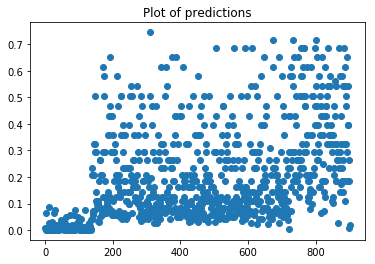

In [51]:
# Skipped code
# Plot of predictions
plt.plot(model.transform(df_ready).select("prediction").toPandas(),'o')
plt.title("Plot of predictions")


## Poisson regression

Use example data from Workshop of Lecture 5, Linear and Nonlinear Models (MScA 31010): Demand for medical care by elderly.

ML library cannot take character predictors. All predictors are converted to numeric format.

In [52]:
df = spark.read.csv('./data/DebTrivediNum.csv', 
                    sep = ',',header=True,inferSchema=True)
print('DataFrame # rows = %s , \
number of columns = %s' % (df.count(),len(df.columns)))
df.show(10)

DataFrame # rows = 4406 , number of columns = 7
+---+----+------+--------+------+------+-------+
|ofp|hosp|health|numchron|gender|school|privins|
+---+----+------+--------+------+------+-------+
|  5|   1|     2|       2|     2|     6|      2|
|  1|   0|     2|       2|     1|    10|      2|
| 13|   3|     1|       4|     1|    10|      1|
| 16|   1|     1|       2|     2|     3|      2|
|  3|   0|     2|       2|     1|     6|      2|
| 17|   0|     1|       5|     1|     7|      1|
|  9|   0|     2|       0|     1|     8|      2|
|  3|   0|     2|       0|     1|     8|      2|
|  1|   0|     2|       0|     1|     8|      2|
|  0|   0|     2|       0|     1|     8|      2|
+---+----+------+--------+------+------+-------+
only showing top 10 rows



In [53]:
df.printSchema()

root
 |-- ofp: integer (nullable = true)
 |-- hosp: integer (nullable = true)
 |-- health: integer (nullable = true)
 |-- numchron: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- school: integer (nullable = true)
 |-- privins: integer (nullable = true)



<font color=blue>

Prepare features in the following cell

+---+----+------+--------+------+------+-------+--------------------+ <br>
|ofp|hosp|health|numchron|gender|school|privins|             feature|<br>
+---+----+------+--------+------+------+-------+--------------------+<br>
|  5|   1|     2|       2|     2|     6|      2|[1.0,2.0,2.0,2.0,...|<br>
|  1|   0|     2|       2|     1|    10|      2|[0.0,2.0,2.0,1.0,...|<br>
| 13|   3|     1|       4|     1|    10|      1|[3.0,1.0,4.0,1.0,...|<br>
| 16|   1|     1|       2|     2|     3|      2|[1.0,1.0,2.0,2.0,...|<br>
|  3|   0|     2|       2|     1|     6|      2|[0.0,2.0,2.0,1.0,...|<br>
+---+----+------+--------+------+------+-------+--------------------+<br>

In [54]:
# Skipped code
# Features
assembler=VectorAssembler(inputCols=["hosp","health","numchron","gender","school","privins"],outputCol="feature")
df_ready2=assembler.transform(df)
df_ready2.show(5)

+---+----+------+--------+------+------+-------+--------------------+
|ofp|hosp|health|numchron|gender|school|privins|             feature|
+---+----+------+--------+------+------+-------+--------------------+
|  5|   1|     2|       2|     2|     6|      2|[1.0,2.0,2.0,2.0,...|
|  1|   0|     2|       2|     1|    10|      2|[0.0,2.0,2.0,1.0,...|
| 13|   3|     1|       4|     1|    10|      1|[3.0,1.0,4.0,1.0,...|
| 16|   1|     1|       2|     2|     3|      2|[1.0,1.0,2.0,2.0,...|
|  3|   0|     2|       2|     1|     6|      2|[0.0,2.0,2.0,1.0,...|
+---+----+------+--------+------+------+-------+--------------------+
only showing top 5 rows



<font color=blue>

Fit Poisson regression model in the following cell.

In [55]:
# Skipped code
# Fitting Poisson regression
glr = GeneralizedLinearRegression(family="poisson",link="log",
                       featuresCol="feature",labelCol="ofp")
model = glr.fit(df_ready2)

<font color=blue>

Calculate predictions in the cell below.

+---+------------------+ <br>
|ofp|        prediction| <br>
+---+------------------+ <br>
|  5| 5.597984548488276| <br>
|  1| 5.908273641596692| <br>
| 13|13.918017249686438| <br>
| 16| 6.840622791047057| <br>
|  3|  5.32000624863982| <br>
| 17| 9.111261190424312| <br>
|  9| 4.190487869904227| <br>
|  3| 4.190487869904227| <br>
|  1| 4.190487869904227| <br>

In [56]:
# Skipped code
# Prediction by Poisson regression
model.transform(df_ready2).show()
print(model.transform(df_ready2).take(1))

+---+----+------+--------+------+------+-------+--------------------+------------------+
|ofp|hosp|health|numchron|gender|school|privins|             feature|        prediction|
+---+----+------+--------+------+------+-------+--------------------+------------------+
|  5|   1|     2|       2|     2|     6|      2|[1.0,2.0,2.0,2.0,...| 5.597984548488303|
|  1|   0|     2|       2|     1|    10|      2|[0.0,2.0,2.0,1.0,...|5.9082736415967885|
| 13|   3|     1|       4|     1|    10|      1|[3.0,1.0,4.0,1.0,...| 13.91801724968611|
| 16|   1|     1|       2|     2|     3|      2|[1.0,1.0,2.0,2.0,...|6.8406227910470125|
|  3|   0|     2|       2|     1|     6|      2|[0.0,2.0,2.0,1.0,...| 5.320006248639936|
| 17|   0|     1|       5|     1|     7|      1|[0.0,1.0,5.0,1.0,...|  9.11126119042413|
|  9|   0|     2|       0|     1|     8|      2|[0.0,2.0,0.0,1.0,...| 4.190487869904298|
|  3|   0|     2|       0|     1|     8|      2|[0.0,2.0,0.0,1.0,...| 4.190487869904298|
|  1|   0|     2|    

<font color=blue>
Print:

AIC = 35967.50871457949 <br>
Deviance = nan <br>
DF = 4399 <br>
NULL Deviance = nan <br>
Slopes = [0.163520706497,-0.279131550019,0.145548457715,-0.112588553502,0.026219800704,0.203960059865]  <br>
Intercept = 1.4859902920639672 <br>

In [57]:
# Skipped code
# Printing summary characteristics
print('Model slopes are: %s' % model.coefficients)
print('Model intercept is %s' % model.intercept)
print('Model AIC is: %s' % model.summary.aic)
print('Model deviance is: %s' % model.summary.deviance)
print('Model degrees of freedom are: %s' % 
      model.summary.degreesOfFreedom)
print('Model null deviance is: %s' \
      % model.summary.nullDeviance)

Model slopes are: [0.163520706497,-0.279131550019,0.145548457715,-0.112588553502,0.026219800704,0.203960059865]
Model intercept is 1.4859902920639245
Model AIC is: 35967.508714579526
Model deviance is: nan
Model degrees of freedom are: 4399
Model null deviance is: nan
